In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [43]:
#Cargamos el archivo airbnb.csv
data= pd.read_csv('airbnb.csv', encoding='ISO-8859-1')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


*****3. Aplicar los siguientes métodos para reemplazar valores nulos en cada columna:*****

In [44]:
#Identificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             7
neighbourhood_group               21669
neighbourhood                         6
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [45]:
#“host_name”: Rellenar con el objeto "anterior" de la columna
data["host_name"] =data["host_name"].fillna(method="bfill") 
data

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data["neighbourhood"] =data["neighbourhood"].fillna(method="ffill") 
data

#“latitude ”: Rellenar con el valor de “Media” de la columna
mean_latitude=data['latitude'].mean() 
data['latitude'].fillna(value=mean_latitude, inplace=True) 

#“longitude”: Rellenar con el valor de “Mediana” de la columna
mean_longitude=data['longitude'].median() 
data['longitude'].fillna(value=mean_longitude, inplace=True) 

#“room_type”: Rellenar con el string “Private room”
data["room_type"] =data["room_type"].fillna("Private_room") 
data

#“price”: Rellenar con el valor de “Media” de la columna
mean_price=data['price'].mean() 
data['price'].fillna(value=mean_price, inplace=True) 

#“minimum_nights”: Rellenar con el valor de “1”
data["minimum_nights"] =data["minimum_nights"].fillna(1) 
data

#"number_of_reviews": Rellenar con el valor de “0”
data["number_of_reviews"] =data["number_of_reviews"].fillna(0) 
data

#"last_review":Rellenar con el objeto "31/12/2022" de la columna
data["last_review"] =data["last_review"].fillna("31/12/2022") 
data

#"reviews_per_month": Rellenar con el valor de “Media” de la columna
mean_reviews_per_month=data['reviews_per_month'].mean() 
data['reviews_per_month'].fillna(value=mean_reviews_per_month, inplace=True) 

#"calculated_host_listings_count": Rellenar con el valor de “1”
data["calculated_host_listings_count"] =data["calculated_host_listings_count"].fillna(1) 
data

#"availability_365" y "number of reviews ltm": Rellenar con el objeto "anterior" de cada columna respectivamente.
data["availability_365"] =data["availability_365"].fillna(method="bfill") 
data

data["number_of_reviews_ltm"] =data["number_of_reviews_ltm"].fillna(method="bfill") 
data

#Se elimina la columna "neighbourhood_group " ya que no existe ningún valor para los 21669 datos
data=data.drop(['neighbourhood_group'],axis=1)

#Se rellena la comuna "name" con el texto "Hermoso depa en Cancún"
data["name"] =data["name"].fillna("Hermoso depa en Cancún") 
data


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.170000,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.586033,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.150000,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.430000,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.730000,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.970000,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.160000,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.586033,1.0,354.0,0.0


In [46]:
#Vemos que ya no tenemps valores nulos en nuestro dataframe
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

*****4 y 5.-Aplicar método de distribución normal y desviación Estandar*****

*****Desviación Estandar*****

In [47]:
#Variable latitude

y=data["latitude"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_latitude= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_latitude

Limite superior permitido 22.02501066296988
Limite inferior permitido 16.79501360562001


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12741,46757982.0,Residencia Master Suite con Terraza,375169008,Residencias,Benito JuÃ¡rez,99.39291,-99.17623,Entire home/apt,3678.0,2.0,0.0,31/12/2022,1.586033,25.0,337.0,0.0
21665,22107097.0,GREAT & cozy flat in Satelite,387195495,Daniela,Azcapotzalco,119.50787,-99.22067,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.970000,11.0,314.0,17.0


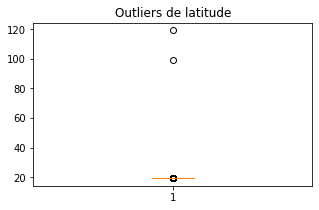

In [48]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #dibujamos el diagrama

In [49]:
#Variable longitude

y2=data["longitude"]
Limite_Superior2= y2.mean() + 3*y2.std()
Limite_Inferior2= y2.mean() - 3*y2.std()
print("Limite superior permitido", Limite_Superior2)
print("Limite inferior permitido", Limite_Inferior2)

#Encontramos Ouliers
outliers_longitude= data[(y2>Limite_Superior2)|(y2<Limite_Inferior2)]
outliers_longitude

Limite superior permitido -89.00097105092638
Limite inferior permitido -109.3286521073947


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12003,45519073.0,Spacious 3BR/3.5BATH in heart of Condesa,2593419,Katie,CuauhtÃ©moc,19.41882,-399.17598,Entire home/apt,3040.0,3.0,48.0,22/05/2022,2.65,1.0,165.0,44.0
12009,45454474.0,Bonito departamento cerca del Ãngel,303864680,Leidi Laura,CuauhtÃ©moc,19.42738,299.16998,Entire home/apt,2670.0,1.0,6.0,09/01/2022,0.28,8.0,359.0,1.0


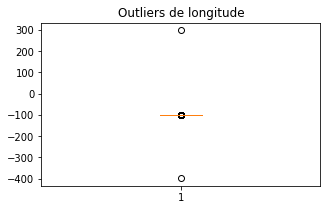

In [50]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #dibujamos el diagrama

In [51]:
#Variable minimum_nights

y3=data["minimum_nights"]
Limite_Superior3= y3.mean() + 3*y3.std()
Limite_Inferior3= y3.mean() - 3*y3.std()
print("Limite superior permitido", Limite_Superior3)
print("Limite inferior permitido", Limite_Inferior3)

#Encontramos Ouliers
outliers_minimum_nights= data[(y3>Limite_Superior3)|(y3<Limite_Inferior3)]
outliers_minimum_nights

Limite superior permitido 85.28175780845893
Limite inferior permitido -75.59916977947745


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,826691.0,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.40915,-99.17321,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.170000,6.0,325.0,0.0
73,1187817.0,Suite 1 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.40915,-99.17321,Entire home/apt,900.0,120.0,50.0,24/11/2018,0.450000,6.0,364.0,0.0
169,525618.0,Beautiful Colonia Roma apartment,2566629,Alejandra & Billy,CuauhtÃ©moc,19.41588,-99.15981,Entire home/apt,2308.0,360.0,26.0,10/09/2018,0.220000,1.0,264.0,0.0
183,1798108.0,Near park Mexico. Brilliant and renovated flat!,1595855,Yahir,CuauhtÃ©moc,19.41638,-99.16868,Entire home/apt,1171.0,180.0,8.0,09/05/2021,0.080000,1.0,365.0,0.0
326,4604145.0,Suite 3 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.40904,-99.17327,Entire home/apt,800.0,179.0,20.0,07/01/2019,0.240000,6.0,364.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21317,48096905.0,Se renta Suite,387846773,Gina,Cuajimalpa de Morelos,19.39884,-99.27079,Entire home/apt,385.0,365.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
21350,23741236.0,Interlomas Perfect Apartment,10358425,Penelope,Cuajimalpa de Morelos,19.38465,-99.29423,Entire home/apt,1806.0,180.0,8.0,26/02/2021,0.160000,1.0,352.0,0.0
21527,17732363.0,DEPARTAMENTOS AMUEBLADOS,120918514,Fernando,Gustavo A. Madero,19.53648,-99.18892,Private room,250.0,180.0,0.0,31/12/2022,1.586033,2.0,365.0,0.0
21545,31946858.0,Bonito cuarto privado para dama en La Florida,146368828,Alexandra,Azcapotzalco,19.49877,-99.23388,Private room,250.0,170.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0


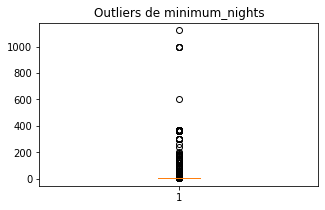

In [52]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de minimum_nights")
plt.show() #dibujamos el diagrama

In [83]:
#Variable price

y4=data["price"]
Limite_Superior4= y4.mean() + 3*y4.std()
Limite_Inferior4= y4.mean() - 3*y4.std()
print("Limite superior permitido", Limite_Superior4)
print("Limite inferior permitido", Limite_Inferior4)

#Encontramos Ouliers
outliers_price= data[(y4>Limite_Superior4)|(y4<Limite_Inferior4)]
outliers_price

Limite superior permitido 25905.95810939629
Limite inferior permitido -23004.991984234766


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
724,6.871835e+06,WTC MÃ©xico Napoles.,36014559,Jorge,Benito JuÃ¡rez,19.396140,-99.173710,Entire home/apt,31386.0,1.0,40.0,22/06/2017,0.470000,1.0,365.0,0.0
1554,1.385978e+07,"Grand Tower 2 queen bedroom,amenities 1block C...",42599988,Hector,Miguel Hidalgo,19.441990,-99.201380,Entire home/apt,26251.0,2.0,4.0,01/01/2017,0.060000,1.0,365.0,0.0
1906,1.542343e+07,HabitaciÃ³n con excelente paisaje,98850558,Tania Anahi,Iztapalapa,19.371820,-99.074390,Private room,30422.0,5.0,0.0,31/12/2022,1.586033,1.0,309.0,0.0
2096,1.622930e+07,"Apartamento cerca de Carso, Antara, Polanco,",130445271,Mario,Miguel Hidalgo,19.444490,-99.203990,Entire home/apt,99998.0,2.0,83.0,29/11/2021,1.280000,8.0,364.0,7.0
2125,1.639185e+07,Spacious apartment in the heart of the city!,26762960,Juan Antonio,CuauhtÃ©moc,19.429610,-99.158760,Entire home/apt,50000.0,1.0,27.0,01/05/2017,0.400000,1.0,202.0,0.0
2513,1.794602e+07,"Antara, Polanco, Carso, Apartamento.",130445271,Mario,Miguel Hidalgo,19.441670,-99.197490,Entire home/apt,57785.0,2.0,96.0,10/06/2022,1.510000,8.0,358.0,3.0
3125,1.994540e+07,Master Suite,141354058,Suites,Miguel Hidalgo,19.427230,-99.196670,Hotel room,40386.0,1.0,11.0,06/11/2021,0.190000,2.0,360.0,1.0
3265,2.058624e+07,Obelisk Suite 1 recÃ¡mara,141354058,Suites,Miguel Hidalgo,19.428380,-99.197390,Private room,40386.0,1.0,1.0,21/11/2018,0.020000,2.0,361.0,0.0
4279,2.389552e+07,HabitaciÃ³n a 40min del centro historico,173103110,Ines,Iztapalapa,19.328990,-98.976970,Private room,350000.0,1.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
4315,2.349835e+07,"CASA EN PEDREGAL , COLONIAL MEXICANO",28935792,Paulina,Ãlvaro ObregÃ³n,19.326260,-99.206030,Entire home/apt,72568.0,160.0,0.0,31/12/2022,1.586033,4.0,180.0,0.0


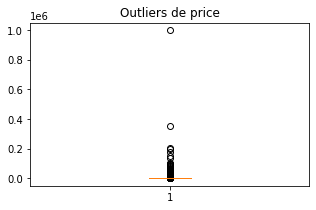

In [54]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["price"]) 
plt.title("Outliers de price")
plt.show() #dibujamos el diagrama

In [55]:
# Variable number_of_reviews

y5=data["number_of_reviews"]
Limite_Superior5= y5.mean() + 3*y5.std()
Limite_Inferior5= y5.mean() - 3*y5.std()
print("Limite superior permitido", Limite_Superior5)
print("Limite inferior permitido", Limite_Inferior5)

#Encontramos Ouliers
outliers_number_of_reviews= data[(y5>Limite_Superior5)|(y5<Limite_Inferior5)]
outliers_number_of_reviews

Limite superior permitido 200.14693399059885
Limite inferior permitido -136.9106978929478


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
23,883511.0,Cozy House with Roofterrace group 29 pax Cente...,3777702,Abraham,CuauhtÃ©moc,19.442070,-99.147970,Entire home/apt,2827.0,1.0,209.0,06/06/2022,1.83,6.0,249.0,27.0
31,165772.0,BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC,790208,Maria Jose,Miguel Hidalgo,19.408260,-99.186590,Entire home/apt,3837.0,2.0,278.0,30/05/2022,2.09,6.0,231.0,8.0
32,2083241.0,Condesa Apartment in 1920s Landmarked Art Nouv...,8282570,Thomas,CuauhtÃ©moc,19.415300,-99.167630,Entire home/apt,1600.0,3.0,246.0,04/06/2022,2.62,3.0,140.0,41.0
33,939721.0,Radiant Apartment with Terrace in Roma Norte,4821807,Alex,CuauhtÃ©moc,19.422880,-99.154880,Entire home/apt,1572.0,3.0,458.0,06/06/2022,4.09,4.0,171.0,49.0
35,997247.0,NEW! HISTORIC BUILDING -BEST STREET,5479592,Lorenzo,CuauhtÃ©moc,19.414340,-99.158570,Entire home/apt,1921.0,2.0,394.0,30/05/2022,3.56,1.0,327.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16325,52769775.0,Charming & Cozy 1BR Apt | 2 Rooftops+Gym+B/Center,335393886,Uliv,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,1558.0,1.0,208.0,19/06/2022,24.96,11.0,364.0,208.0
16326,52769810.0,2BR Apt w/Balcony |Rooftop-FirePit+Best Views+Gym,335393886,Uliv,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,2104.0,1.0,286.0,19/06/2022,34.46,11.0,365.0,286.0
16327,52769824.0,Wonderful 2BR Apt |Polanco|2 Rooftops+Gym+B/Ce...,335393886,Uliv,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,1900.0,1.0,272.0,19/06/2022,32.64,11.0,365.0,272.0
16328,52769833.0,Cute & Intimate Apt | Gym+2 Rooftops+Fire Pit+...,335393886,Uliv,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,1612.0,1.0,277.0,18/06/2022,33.24,11.0,365.0,277.0


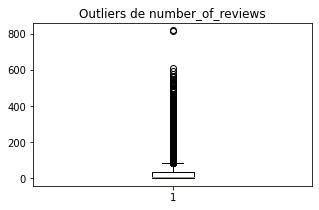

In [56]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #dibujamos el diagrama

In [57]:
# variable reviews_per_month

y6=data["reviews_per_month"]
Limite_Superior6= y6.mean() + 3*y6.std()
Limite_Inferior6= y6.mean() - 3*y6.std()
print("Limite superior permitido", Limite_Superior6)
print("Limite inferior permitido", Limite_Inferior6)

#Encontramos Ouliers
outliers_reviews_per_month= data[(y6>Limite_Superior6)|(y6<Limite_Inferior6)]
outliers_reviews_per_month

Limite superior permitido 7.045921913543318
Limite inferior permitido -3.873856751486641


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1488,1.339804e+07,Depa privado para visitar monumentos emblemÃ¡t...,70937648,Victor,CuauhtÃ©moc,19.434310,-99.145940,Entire home/apt,1217.0,1.0,529.0,19/06/2022,7.37,17.0,256.0,104.0
1674,1.415008e+07,5 min to CDMX airport,10644799,Benito,Venustiano Carranza,19.439490,-99.087690,Entire home/apt,385.0,1.0,579.0,08/05/2022,8.17,6.0,354.0,19.0
1675,1.415013e+07,5 min to CDMX airport,10644799,Benito,Venustiano Carranza,19.439490,-99.087690,Entire home/apt,406.0,1.0,552.0,30/05/2022,7.68,6.0,346.0,26.0
1785,1.432096e+07,Trendy and cozy apartment at CondesaÂ´s heart,60203647,Alex Y May,CuauhtÃ©moc,19.412820,-99.175380,Entire home/apt,1263.0,1.0,501.0,26/05/2022,7.07,10.0,301.0,70.0
2247,1.702510e+07,Bedroom near the airport of the city of Mexico,114195033,Rogelio,Iztacalco,19.413940,-99.057300,Private room,280.0,1.0,495.0,27/05/2022,7.63,1.0,342.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20226,6.270000e+17,Danni's sunny & spacious Home,310183141,Kristina,CuauhtÃ©moc,19.417520,-99.177640,Private room,351.0,1.0,8.0,19/06/2022,8.00,2.0,333.0,8.0
20232,6.290000e+17,Apt Monet | Polanco | Antara,338026302,Edith,Miguel Hidalgo,19.437130,-99.202400,Entire home/apt,1101.0,1.0,8.0,19/06/2022,7.50,1.0,314.0,8.0
20255,6.310000e+17,Loft Suite JuÃ¡rez Reforma a tres cuadras del ...,245618000,Alejandra,CuauhtÃ©moc,19.423483,-99.168915,Entire home/apt,970.0,1.0,12.0,20/06/2022,12.00,45.0,64.0,12.0
20352,6.300000e+17,302â LA MEJOR UBICACIÃN ! REFORMA / CHAPULT...,452872126,Rio Hudson,Miguel Hidalgo,19.427580,-99.175510,Entire home/apt,1200.0,2.0,8.0,19/06/2022,8.00,9.0,360.0,8.0


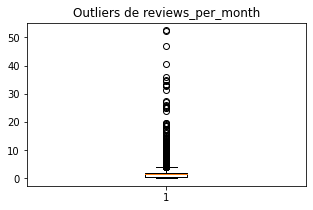

In [58]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #dibujamos el diagrama

In [59]:
#Variable availability_365

y7=data["availability_365"]
Limite_Superior7= y7.mean() + 3*y7.std()
Limite_Inferior7= y7.mean() - 3*y7.std()
print("Limite superior permitido", Limite_Superior7)
print("Limite inferior permitido", Limite_Inferior7)

#Encontramos Ouliers
outliers_availability_365= data[(y7>Limite_Superior7)|(y7<Limite_Inferior7)]
outliers_availability_365


Limite superior permitido 612.4014586334399
Limite inferior permitido -125.45042259116755


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15,2056638.0,Amplio y luminoso loft en CoyoacÃ¡n,10531228,Maria,CoyoacÃ¡n,19.35353,-99.16299,Entire home/apt,1602.0,1.0,21.0,24/06/2018,0.2,3.0,1290.0,0.0


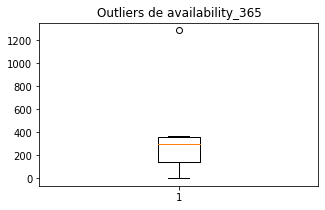

In [60]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #dibujamos el diagrama

*****rango intercuartílico*****

In [61]:
#latitude

y8=data["latitude"]

percentile258=y8.quantile(0.25) #Q1
percentile758=y8.quantile(0.75) #Q3
iqr8= percentile758 - percentile258

Limite_Superior_iqr8= percentile758 + 1.5*iqr8
Limite_Inferior_iqr8= percentile258 - 1.5*iqr8
print("Limite superior permitido", Limite_Superior_iqr8)
print("Limite inferior permitido", Limite_Inferior_iqr8)

outliers_iqrlatitude= data[(y8>Limite_Superior_iqr8)|(y8<Limite_Inferior_iqr8)]
outliers_iqrlatitude

Limite superior permitido 19.507845000000003
Limite inferior permitido 19.303884999999994


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
96,329776.0,HabitaciÃ³n Verde.,1683373,Miguel,Tlalpan,19.27510,-99.17757,Private room,303.0,2.0,16.0,25/12/2021,0.270000,5.0,0.0,1.0
194,609594.0,House in Xochimilco,2223274,Luis,Xochimilco,19.26541,-99.11365,Entire home/apt,608.0,21.0,12.0,06/10/2020,0.140000,1.0,325.0,0.0
206,1920070.0,Mountain Oasis surrender by trees,9953466,Gabriela,Tlalpan,19.24444,-99.17044,Private room,417.0,1.0,3.0,27/10/2019,0.050000,1.0,365.0,0.0
213,1945351.0,"Private room. Near COLMEX, UPN, FLACSO",340030,Griselda,Tlalpan,19.28356,-99.21837,Private room,608.0,3.0,2.0,26/01/2018,0.040000,3.0,365.0,0.0
277,3506037.0,SUITES BOSQUES MEDICA SUR,17650235,Chelita,CoyoacÃ¡n,19.29966,-99.15624,Private room,533.0,1.0,0.0,31/12/2022,1.586033,3.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,52622073.0,Departamento Viveros del Lago.\nEnfrente de la...,21515326,Roberto,Azcapotzalco,19.52295,-99.22571,Entire home/apt,1000.0,1.0,25.0,05/06/2022,2.920000,2.0,334.0,25.0
21646,33914551.0,Cozy depa,256115671,Atilio,Azcapotzalco,19.51632,-99.22004,Entire home/apt,393.0,2.0,77.0,02/06/2022,2.000000,1.0,55.0,33.0
21652,39023239.0,Recamara privada cerca del metro Rosario,298373642,BenjamÃ­n,Azcapotzalco,19.51389,-99.20757,Private room,300.0,2.0,0.0,31/12/2022,1.586033,1.0,176.0,0.0
21656,16928664.0,Hermosa habitaciÃ³n con baÃ±o privado,101147814,Sandra,Azcapotzalco,19.50816,-99.22190,Private room,579.0,1.0,1.0,06/04/2018,0.020000,1.0,87.0,0.0


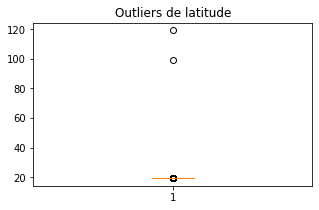

In [62]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #dibujamos el diagrama

In [63]:
#longitude

y9=data["longitude"]

percentile259=y9.quantile(0.25) #Q1
percentile759=y9.quantile(0.75) #Q3
iqr9= percentile759 - percentile259

Limite_Superior_iqr9= percentile759 + 1.5*iqr9
Limite_Inferior_iqr9= percentile259 - 1.5*iqr9
print("Limite superior permitido", Limite_Superior_iqr9)
print("Limite inferior permitido", Limite_Inferior_iqr9)

outliers_iqr9= data[(y9>Limite_Superior_iqr9)|(y9<Limite_Inferior_iqr9)]
outliers_iqr9

Limite superior permitido -99.112735
Limite inferior permitido -99.222695


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,3.579700e+04,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.586033,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
6,1.551198e+07,La casa de Abraham,93364273,Abraham,Miguel Hidalgo,19.410950,-99.244180,Private room,800.0,1.0,1.0,19/03/2018,0.020000,1.0,179.0,0.0
7,3.477645e+07,â The attic â Panoramic garden 10 min Citi...,2954577,Lazaro Alejandro,Miguel Hidalgo,19.426410,-99.225910,Private room,1779.0,1.0,5.0,14/03/2022,0.140000,4.0,222.0,1.0
8,4.576710e+07,BONITO DEPARTAMENTO NUEVO LOMAS DE TECAMACHALCO,371036285,Luis,Miguel Hidalgo,19.419470,-99.240630,Private room,500.0,7.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21663,4.588272e+07,"Big/nice/YOGUI room, in relax & sure neighborhood",47070934,Alejandra,Azcapotzalco,19.501490,-99.228090,Private room,250.0,6.0,0.0,31/12/2022,1.586033,1.0,364.0,3.0
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.730000,79.0,314.0,3.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.160000,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.586033,1.0,354.0,0.0


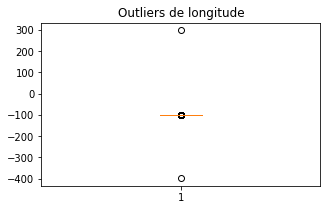

In [64]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #dibujamos el diagrama

In [84]:
#price

y10=data["price"]

percentile2510=y10.quantile(0.25) #Q1
percentile7510=y10.quantile(0.75) #Q3
iqr10= percentile7510 - percentile2510

Limite_Superior_iqr10= percentile7510 + 1.5*iqr10
Limite_Inferior_iqr10= percentile2510 - 1.5*iqr10
print("Limite superior permitido", Limite_Superior_iqr10)
print("Limite inferior permitido", Limite_Inferior_iqr10)

outliers_iqr10= data[(y10>Limite_Superior_iqr10)|(y10<Limite_Inferior_iqr10)]
outliers_iqr10

Limite superior permitido 2960.0
Limite inferior permitido -976.0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,3.579700e+04,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.586033,1.0,363.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,CuauhtÃ©moc,19.41162,-99.17794,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.430000,11.0,347.0,7.0
28,1.070780e+05,NEW DESIGNER LOFT,540705,Andrea,Miguel Hidalgo,19.43211,-99.19327,Entire home/apt,3796.0,4.0,10.0,05/10/2019,0.140000,3.0,208.0,0.0
31,1.657720e+05,BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC,790208,Maria Jose,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3837.0,2.0,278.0,30/05/2022,2.090000,6.0,231.0,8.0
39,2.093036e+06,Departamento 2 dormitorios x Antara,3083561,Federico,Miguel Hidalgo,19.44178,-99.20202,Private room,3130.0,1.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,1.377077e+07,Estudiantes parada Tec AnÃ¡huac.,80804417,Luz Elena,Gustavo A. Madero,19.53352,-99.19122,Private room,4700.0,36.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
21567,3.603670e+07,Departamento Remodelado en Renta Echegaray,271110724,Il,Azcapotzalco,19.48724,-99.22519,Entire home/apt,10000.0,180.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
21598,5.450000e+17,Cheerful 4 bedroom residence in nice neighborhood,441385756,Fernando,Miguel Hidalgo,19.42275,-99.25692,Entire home/apt,5000.0,3.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
21609,6.490000e+17,4 habitaciones 11 camas en casa compartida,138094276,Erika,Iztapalapa,19.39786,-99.04539,Private room,3500.0,1.0,0.0,31/12/2022,1.586033,11.0,359.0,0.0


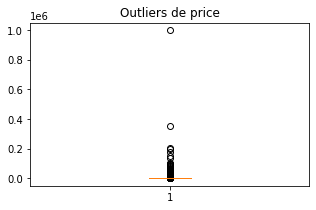

In [66]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["price"]) 
plt.title("Outliers de price")
plt.show() #dibujamos el diagrama

In [67]:
#minimum_nights

y11=data["minimum_nights"]

percentile2511=y11.quantile(0.25) #Q1
percentile7511=y11.quantile(0.75) #Q3
iqr11= percentile7511 - percentile2511

Limite_Superior_iqr11= percentile7511 + 1.5*iqr11
Limite_Inferior_iqr11= percentile2511 - 1.5*iqr11
print("Limite superior permitido", Limite_Superior_iqr11)
print("Limite inferior permitido", Limite_Inferior_iqr11)

outliers_iqr11= data[(y11>Limite_Superior_iqr11)|(y11<Limite_Inferior_iqr11)]
outliers_iqr11

Limite superior permitido 6.0
Limite inferior permitido -2.0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,826691.0,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.40915,-99.17321,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.170000,6.0,325.0,0.0
8,45767104.0,BONITO DEPARTAMENTO NUEVO LOMAS DE TECAMACHALCO,371036285,Luis,Miguel Hidalgo,19.41947,-99.24063,Private room,500.0,7.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
16,58955.0,Entire beautiful duplex in la Roma,282620,Laura,CuauhtÃ©moc,19.42113,-99.15955,Entire home/apt,2019.0,7.0,45.0,06/01/2022,0.350000,1.0,351.0,3.0
27,70644.0,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,CoyoacÃ¡n,19.35448,-99.16217,Entire home/apt,1197.0,7.0,112.0,20/06/2022,0.890000,3.0,153.0,8.0
41,187030.0,Spacious apt with the best rooftop in Condesa,899360,Julian,CuauhtÃ©moc,19.41057,-99.17730,Entire home/apt,2142.0,14.0,98.0,28/05/2022,0.760000,6.0,171.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21577,46948276.0,Habitaciones con ambiente tranquilo,379425976,Gisela,Gustavo A. Madero,19.50459,-99.04702,Shared room,210.0,30.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
21594,41901466.0,Alojamiento a 10 minutos de Ã©l Aeropuerto CDMX,325761667,Isaac,Gustavo A. Madero,19.47178,-99.05042,Private room,406.0,10.0,0.0,31/12/2022,1.586033,2.0,358.0,0.0
21600,26589089.0,Nueva habitacion en renta,62576597,Lupe,Cuajimalpa de Morelos,19.40953,-99.26700,Private room,500.0,7.0,1.0,08/11/2018,0.020000,1.0,173.0,0.0
21628,23056362.0,suite en la herradura la mejor vista,170621268,Carolina,Miguel Hidalgo,19.42308,-99.25948,Private room,317.0,7.0,0.0,31/12/2022,1.586033,1.0,90.0,0.0


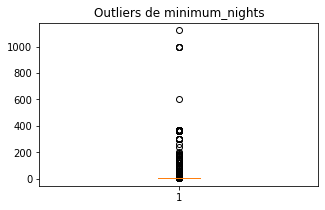

In [68]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de minimum_nights")
plt.show() #dibujamos el diagrama

In [69]:
#number_of_reviews

y12=data["number_of_reviews"]

percentile2512=y12.quantile(0.25) #Q1
percentile7512=y12.quantile(0.75) #Q3
iqr12= percentile7512 - percentile2512

Limite_Superior_iqr12= percentile7512 + 1.5*iqr12
Limite_Inferior_iqr12= percentile2512 - 1.5*iqr12
print("Limite superior permitido", Limite_Superior_iqr12)
print("Limite inferior permitido", Limite_Inferior_iqr12)

outliers_iqr12= data[(y12>Limite_Superior_iqr12)|(y12<Limite_Inferior_iqr12)]
outliers_iqr12

Limite superior permitido 86.0
Limite inferior permitido -50.0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9,832805.0,ROOMS CASA INDIGO WITH TERRACE AT CITY CENTER,3777702,Abraham,CuauhtÃ©moc,19.44262,-99.14566,Private_room,444.0,1.0,125.0,26/01/2022,1.08,6.0,288.0,2.0
23,883511.0,Cozy House with Roofterrace group 29 pax Cente...,3777702,Abraham,CuauhtÃ©moc,19.44207,-99.14797,Entire home/apt,2827.0,1.0,209.0,06/06/2022,1.83,6.0,249.0,27.0
27,70644.0,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,CoyoacÃ¡n,19.35448,-99.16217,Entire home/apt,1197.0,7.0,112.0,20/06/2022,0.89,3.0,153.0,8.0
30,913084.0,15 blocks from Paseo de la Reforma,4647293,Martina,Miguel Hidalgo,19.43956,-99.17263,Entire home/apt,2057.0,2.0,139.0,13/06/2022,1.25,2.0,180.0,27.0
31,165772.0,BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC,790208,Maria Jose,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3837.0,2.0,278.0,30/05/2022,2.09,6.0,231.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,19628292.0,15 min Aeropuerto AutÃ³dromo Palacio de los de...,138094276,Erika,Iztapalapa,19.39794,-99.04350,Private room,350.0,1.0,144.0,13/06/2022,2.54,11.0,361.0,17.0
21431,24064511.0,ð³ï¸âðCLOSE TO AIRPORT & DOWNTOWN @IDE...,160773275,Gonzalo,Gustavo A. Madero,19.46194,-99.05415,Entire home/apt,401.0,2.0,100.0,04/05/2022,1.96,5.0,323.0,11.0
21445,22973104.0,"Depa1 FÃ¡cil Acceso Aeropuerto, Metro,Bosque A...",170284149,Eunice,Gustavo A. Madero,19.45781,-99.05398,Entire home/apt,303.0,1.0,136.0,05/06/2022,2.56,2.0,359.0,24.0
21615,25090111.0,"CÃMODO APARTAMENTO PLANTA ALTA, 20min aeropuerto",127271180,VÃ­ctor,Gustavo A. Madero,19.48893,-99.06681,Entire home/apt,450.0,1.0,158.0,12/05/2022,3.31,1.0,362.0,38.0


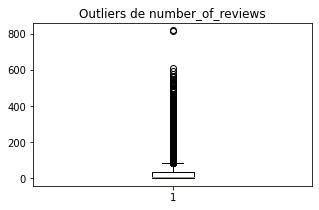

In [70]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #dibujamos el diagrama

In [71]:
#reviews_per_month

y13=data["reviews_per_month"]

percentile2513=y13.quantile(0.25) #Q1
percentile7513=y13.quantile(0.75) #Q3
iqr13= percentile7513 - percentile2513

Limite_Superior_iqr13= percentile7513 + 1.5*iqr13
Limite_Inferior_iqr13= percentile2513 - 1.5*iqr13
print("Limite superior permitido", Limite_Superior_iqr13)
print("Limite inferior permitido", Limite_Inferior_iqr13)

outliers_iqr13= data[(y13>Limite_Superior_iqr13)|(y13<Limite_Inferior_iqr13)]
outliers_iqr13

Limite superior permitido 4.005
Limite inferior permitido -1.6349999999999998


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
33,9.397210e+05,Radiant Apartment with Terrace in Roma Norte,4821807,Alex,CuauhtÃ©moc,19.422880,-99.154880,Entire home/apt,1572.0,3.0,458.0,06/06/2022,4.09,4.0,171.0,49.0
36,2.084093e+06,5 min from CDMXÂ´s airport,10644799,Benito,Venustiano Carranza,19.439490,-99.087690,Entire home/apt,446.0,1.0,562.0,28/05/2022,5.92,6.0,354.0,24.0
214,2.863598e+06,"Cozy, sunny room. Located in the heart of CDMX",13793390,Mario,Benito JuÃ¡rez,19.392130,-99.172070,Private room,344.0,2.0,10.0,17/06/2022,5.08,1.0,274.0,10.0
298,3.635953e+06,Nice Loft in the heart of Polanco,18334496,Nando,Miguel Hidalgo,19.432150,-99.188510,Entire home/apt,1620.0,1.0,548.0,17/06/2022,5.70,4.0,76.0,62.0
337,3.849434e+06,"15th floor apartment Roma Norte, Mexico City",10731286,Larren,CuauhtÃ©moc,19.420440,-99.166820,Entire home/apt,1241.0,2.0,348.0,06/06/2022,5.52,2.0,314.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21219,5.540000e+17,FantÃ¡stico Departamento de 2 Recamaras en Sat...,442065952,Ricardo,Azcapotzalco,19.499702,-99.225136,Entire home/apt,766.0,1.0,25.0,12/06/2022,5.77,79.0,343.0,25.0
21312,5.036232e+07,HabitaciÃ³n confortable en Natura Residencial,406763976,Enrique Alejandro,Azcapotzalco,19.514060,-99.222730,Private room,439.0,1.0,46.0,12/06/2022,4.41,1.0,359.0,46.0
21530,6.230000e+17,Tranquilo departamento con servicios incluidos,191626918,AlÃ­,Azcapotzalco,19.507942,-99.221069,Private room,350.0,1.0,7.0,19/06/2022,5.68,1.0,365.0,7.0
21608,5.440000e+17,"Departamento ""Villada"" en NezahualcÃ³yotl",140057345,Nancy Y Baldemar,Iztapalapa,19.392880,-99.009130,Entire home/apt,326.0,2.0,18.0,11/06/2022,4.19,1.0,333.0,18.0


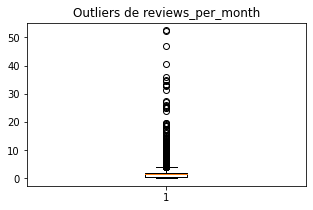

In [72]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #dibujamos el diagrama

In [73]:
#availability_365

y14=data["availability_365"]

percentile2514=y14.quantile(0.25) #Q1
percentile7514=y14.quantile(0.75) #Q3
iqr14= percentile7513 - percentile2513

Limite_Superior_iqr14= percentile7514 + 1.5*iqr14
Limite_Inferior_iqr14= percentile2514 - 1.5*iqr14
print("Limite superior permitido", Limite_Superior_iqr14)
print("Limite inferior permitido", Limite_Inferior_iqr14)

outliers_iqr14= data[(y14>Limite_Superior_iqr14)|(y14<Limite_Inferior_iqr14)]
outliers_iqr14

Limite superior permitido 358.115
Limite inferior permitido 142.885


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,35797.0,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.586033,1.0,363.0,0.0
2,52390579.0,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
5,828714.0,Apartment with Internet & 2 cable TV's,4344353,Miriam,CoyoacÃ¡n,19.341830,-99.155330,Entire home/apt,608.0,1.0,25.0,21/05/2018,0.360000,1.0,140.0,0.0
8,45767104.0,BONITO DEPARTAMENTO NUEVO LOMAS DE TECAMACHALCO,371036285,Luis,Miguel Hidalgo,19.419470,-99.240630,Private room,500.0,7.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
10,28466997.0,Casa de LulÃº,214885342,LulÃº,Cuajimalpa de Morelos,19.396830,-99.276780,Private room,1000.0,1.0,2.0,02/12/2021,0.050000,1.0,365.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21661,18505794.0,Excelente habitaciÃ³n privada en la mejor zona,75820963,Aylin,Cuajimalpa de Morelos,19.405220,-99.278260,Private_room,490.0,2.0,2.0,01/11/2017,0.030000,1.0,365.0,0.0
21662,51686971.0,Hostal 14 .3 \nhabitaciÃ³n privada con baÃ±o,395371158,Gabriela,Gustavo A. Madero,19.484990,-99.060730,Private_room,210.0,1.0,6.0,05/12/2021,0.640000,6.0,365.0,6.0
21663,45882719.0,"Big/nice/YOGUI room, in relax & sure neighborhood",47070934,Alejandra,Azcapotzalco,19.501490,-99.228090,Private room,250.0,6.0,0.0,31/12/2022,1.586033,1.0,364.0,3.0
21666,40617809.0,Blanca,96471106,Mary Carmen,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.160000,4.0,140.0,0.0


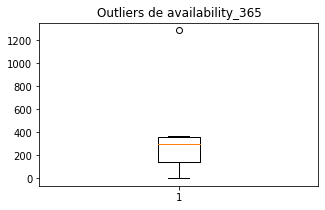

In [74]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #dibujamos el diagrama

*****Elección de metodo de sustitución de outliers*****

In [75]:
#Realizamos una copia del dataframe
data2=data.copy()

In [76]:
#Primera sustitución: latitude
#Desviación estándar
#data3=data2[(y<=Limite_Superior)&(y>=Limite_Inferior)] 
#data3["latitude"]=data3["latitude"].fillna(round(data2["latitude"].mean(),2))

#No se ve influenciada por valores extremos, ya que solo influyen los valores centrales.

In [77]:
#Segunda sustitución: longitude
#Desviación estándar
#data3=data2[(y2<=Limite_Superior2)&(y2>=Limite_Inferior2)] 
#data3["longitude"]=data3["longitude"].fillna(round(data2["longitude"].mean(),0))

#No se ve influenciada por valores extremos, ya que solo influyen los valores centrales.

In [78]:
#Tercera sustitución: price
#Desviación estándar
data3=data2[(y4<=Limite_Superior4)&(y4>=Limite_Inferior4)] 
data3["price"]=data3["price"].fillna(round(data2["price"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_880/2155290536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["price"]=data3["price"].fillna(round(data2["price"].mean(),2))


In [79]:
#Cuarta sustitución: minimum_nights
#Desviación Estandar
data3=data2[(y3<=Limite_Superior3)&(y3>=Limite_Inferior3)] 
data3["minimum_nights"]=data3["minimum_nights"].fillna(round(data2["minimum_nights"].median(),2))
#Sesgo hacia arriba
 #(Valores enteros)

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_880/3423314097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["minimum_nights"]=data3["minimum_nights"].fillna(round(data2["minimum_nights"].median(),2))


In [80]:
#Quinta sustitución: number_of_reviews
#Desviación Estandar
data3=data2[(y5<=Limite_Superior5)&(y5>=Limite_Inferior5)] 
data3["number_of_reviews"]=data3["number_of_reviews"].fillna(round(data2["number_of_reviews"].median(),2))
#Sesgo hacia arriba mas notorio pero los valores estan mas agrupados
 #(Valores enteros)

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_880/1696984627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["number_of_reviews"]=data3["number_of_reviews"].fillna(round(data2["number_of_reviews"].median(),2))


In [81]:
#Sexta sustitución: reviews_per_month
#Desviación Estandar
data3=data2[(y6<=Limite_Superior6)&(y6>=Limite_Inferior6)] 
data3["reviews_per_month"]=data3["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),2))
#Sesgo hacia arriba mas notorio pero los valores estan mas agrupados

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_880/1671661840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["reviews_per_month"]=data3["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),2))


In [82]:
#Septima sustitución: availability_365
#Desviación Estandar
data3=data2[(y7<=Limite_Superior7)&(y7>=Limite_Inferior7)] 
data3["availability_365"]=data3["availability_365"].fillna(round(data2["availability_365"].mode(),2))
#Datos agrupados, solo 1 outlier

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_880/1892190140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["availability_365"]=data3["availability_365"].fillna(round(data2["availability_365"].mode(),2))


In [44]:
data3.to_csv("airbnb_clean.csv")